# Kaggle Project: House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [313]:
train_raw = pd.read_csv('train.csv')

In [3]:
train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_raw.shape

(1460, 81)

In [6]:
train_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# check the correlation between each pair of variables

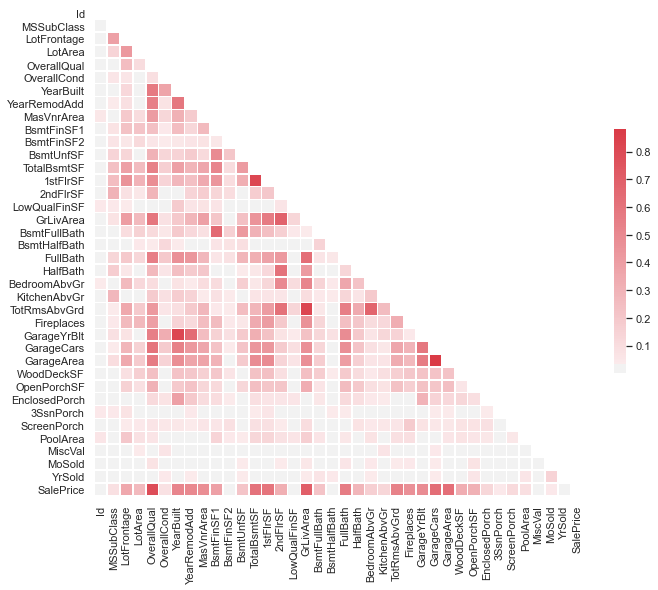

In [6]:
sns.set(style="white")

# Compute the correlation matrix
corr = train_raw.corr().abs()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
# # Create correlation matrix
# corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
# np.triu: https://www.w3resource.com/numpy/array-creation/triu.php
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# # Drop features 
# train_raw.drop(to_drop, axis=1, inplace=True)

In [19]:
np.ones(corr.shape)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

corr.where(np.triu(np.ones(corr.shape), k=0).astype(np.bool))

# Step 0: Data Cleaning

In [507]:
train_raw = pd.read_csv('train.csv')

In [508]:
train_raw = train_raw.drop(columns = ['Id'])

In [509]:
# drop na rows in columns = ["MasVnrType", 'Electrical'], too trivial so we don't care about
train_raw = train_raw.dropna(subset =  ["MasVnrType", "Electrical"])

In [510]:
# get the mode of LotFrontage
LotFrontage_mode = np.nanmedian(train_raw["LotFrontage"])
train_raw.fillna(value = {'LotFrontage':LotFrontage_mode}, inplace = True)
# train_raw["LotFrontage"].fillna(LotFrontage_mode, inplace=True)

In [511]:
# replace categorical data 
train_raw.fillna(value = {'Alley':"NoAlleyAccess"
                          ,'BsmtQual':"NoBasement"
                          ,'BsmtCond':"NoBasement"
                          ,'BsmtExposure':"NoBasement"
                          ,'BsmtFinType1':"NoBasement"
                          ,'BsmtFinType2':"NoBasement"
                          ,'FireplaceQu':"NoFirePlace"
                          ,'GarageType':"NoGarage"
                          ,'GarageYrBlt':0.0
                          ,'GarageFinish':"NoGarage"
                          ,'GarageQual':"NoGarage"
                          ,'GarageCond':"NoGarage"
                          ,'PoolQC':"NoPool"
                          ,'Fence':"NoFence"
                          ,'MiscFeature':"NoOtherFeatures"
                         }
                 , inplace = True)


In [512]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

# Step 1: Seperate categorical features and numerical features

In [515]:
num_columns = list(train_raw._get_numeric_data().columns)

In [564]:
len(num_columns)

37

In [645]:
target_column = ['SalePrice']

In [588]:
fake_num_columns = ['MSSubClass','YrSold','OverallQual'
                    ,'GarageYrBlt','YearBuilt','OverallCond'
                    ,'MoSold','YearRemodAdd'
                   ]

In [589]:
len(fake_num_columns)

8

In [646]:
true_num_columns = list(set(num_columns) - set(fake_num_columns) - set(target_column))

In [647]:
len(true_num_columns)

28

In [648]:
len(true_num_columns) + len(fake_num_columns) + len(target_column)

37

In [649]:
cat_columns = list(set(train_raw.columns) - set(num_columns))

In [650]:
len(cat_columns)

43

In [654]:
true_cat_columns = cat_columns + fake_num_columns 

In [655]:
len(true_cat_columns)

51

In [657]:
len(true_cat_columns) + len(true_num_columns) + len(target_column)

80

In [658]:
len(cat_columns) + len(fake_num_columns) + len(true_num_columns) + len(target_column)

80

In [659]:
train_raw.shape

(1451, 80)

# Step 2: scale the numerical features

In [687]:
len(true_num_columns)

28

In [679]:
num_train_raw = train_raw[true_num_columns]

In [700]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
scaled_num_train_raw = standardscaler.fit_transform(num_train_raw)
scaled_num_train_raw = np.c_[scaled_num_train_raw, train_raw[target_column]]
scaled_num_train_raw = pd.DataFrame(scaled_num_train_raw, columns = true_num_columns + target_column)

In [701]:
scaled_num_train_raw.head()

,ScreenPorch,BsmtFinSF1,MasVnrArea,PoolArea,2ndFlrSF,LotFrontage,GarageArea,BsmtHalfBath,OpenPorchSF,MiscVal,...,KitchenAbvGr,Fireplaces,TotRmsAbvGrd,BedroomAbvGr,WoodDeckSF,3SsnPorch,GarageCars,BsmtFullBath,TotalBsmtSF,SalePrice
0,-0.271106,0.579345,0.509503,-0.068905,1.162628,-0.219887,0.352525,-0.241851,0.220747,-0.087961,...,-0.21037,-0.952520,0.912116,0.163244,-0.752932,-0.116704,0.313988,1.110846,-0.457576,208500.0
1,-0.271106,1.176868,-0.573097,-0.068905,-0.794728,0.460791,-0.058502,3.935838,-0.702973,-0.087961,...,-0.21037,0.602156,-0.317884,0.163244,1.623585,-0.116704,0.313988,-0.817189,0.469865,181500.0
2,-0.271106,0.096054,0.321705,-0.068905,1.190131,-0.083752,0.632770,-0.241851,-0.066969,-0.087961,...,-0.21037,0.602156,-0.317884,0.163244,-0.752932,-0.116704,0.313988,1.110846,-0.311378,223500.0
3,-0.271106,-0.497076,-0.573097,-0.068905,0.938013,-0.446780,0.791576,-0.241851,-0.172970,-0.087961,...,-0.21037,0.602156,0.297116,0.163244,-0.752932,-0.116704,1.650046,1.110846,-0.686010,140000.0
4,-0.271106,0.467309,1.360116,-0.068905,1.618733,0.642305,1.697704,-0.241851,0.569034,-0.087961,...,-0.21037,0.602156,1.527117,1.390532,0.778247,-0.116704,1.650046,1.110846,0.202598,250000.0


# Step 3: For categorical features, use one-hot for dummies

In [613]:
test = train_raw.copy()

In [702]:
cat_train_raw = train_raw[true_cat_columns]

In [703]:
cat_train_raw_dummy = pd.get_dummies(data=cat_train_raw, columns=true_cat_columns)

In [704]:
cat_train_raw_dummy.shape

(1451, 588)

In [705]:
cat_train_raw_dummy.info(max_cols = 700)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 588 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   BsmtCond_Fa                  1451 non-null   uint8
 1   BsmtCond_Gd                  1451 non-null   uint8
 2   BsmtCond_NoBasement          1451 non-null   uint8
 3   BsmtCond_Po                  1451 non-null   uint8
 4   BsmtCond_TA                  1451 non-null   uint8
 5   Exterior1st_AsbShng          1451 non-null   uint8
 6   Exterior1st_AsphShn          1451 non-null   uint8
 7   Exterior1st_BrkComm          1451 non-null   uint8
 8   Exterior1st_BrkFace          1451 non-null   uint8
 9   Exterior1st_CBlock           1451 non-null   uint8
 10  Exterior1st_CemntBd          1451 non-null   uint8
 11  Exterior1st_HdBoard          1451 non-null   uint8
 12  Exterior1st_ImStucc          1451 non-null   uint8
 13  Exterior1st_MetalSd          1451 non-null   ui

# Step 3: feature selection

## Deliminate high correlation features



In [257]:
# algothrim for deliminate high correlation features

def delete_correlation_features(df, correlation_threshold):
    # step 1: compute the correlation matrix (including y/SalePrice feature)
    corr = df.drop(columns = ['Id']).corr().abs()
    all_columns = corr.columns
    # copy columns names for loop
    left_columns = all_columns.copy()
    # empty list for keep features and delete features
    keep_features = []
    delete_features = []
    # replace the correlation matrix diagonal so it wouldn't affect our calculation
    corr = corr.replace(1, 0)

    # initialize a for loop
    for i in range(len(all_columns)):
        
        # if we are able to find a correlation value larger than our threshold
        if max(np.max(corr)) >= correlation_threshold:

            # step 2: select the highest correlation pair regarding to y variable
            highest_corr = corr['SalePrice'][np.argmax(corr['SalePrice'])]

            # step 3: select the variable that's highly correlated to y according to this correlation selected previously
            # first, select the variable has highest correlation with y, keep it
            y_highest_feature_temp = list(np.where(corr["SalePrice"] == highest_corr)[0])
            y_highest_feature = corr.columns[np.where(corr["SalePrice"] == highest_corr)[0]].tolist()
            # append new features that to be kept
            keep_features += y_highest_feature
            # select the pair features that are highly correlated with this kept feature, and delete them
            temp_corr = pd.DataFrame(corr['SalePrice'])
            temp_corr.drop( temp_corr[ temp_corr['SalePrice'] == highest_corr ].index , inplace=True)
            del_corr_df = temp_corr[temp_corr['SalePrice'] >= 0.6].T.columns.tolist()
            # append new features that to be deleted
            delete_features += del_corr_df
            # drop both kept and deleted features from data frame
            left_columns = left_columns.drop(y_highest_feature) 
            left_columns = left_columns.drop(del_corr_df) 
            # update correlation matrix and start again
            corr = df[left_columns].corr().abs()
            corr = corr.replace(1, 0)
            i += 1
    return corr, corr.columns

In [ ]:
x_train = 

In [ ]:
import time
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

start_time=time.time()

#### Create X and Y training data here.....


# grid search
model = XGBClassifier()

param_grid = {
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'min_child_weight': np.arange(0.0001, 0.5, 0.001),
        'gamma': np.arange(0.0,40.0,0.005),
        'learning_rate': np.arange(0.0005,0.3,0.0005),
        'subsample': np.arange(0.01,1.0,0.01),
        'colsample_bylevel': np.round(np.arange(0.1,1.0,0.01)),
        'colsample_bytree': np.arange(0.1,1.0,0.01)
                                      }

kfold = KFold(n_splits=10, shuffle=True, random_state=10)
grid_search = RandomizedSearchCV(model, param_grid, scoring="roc_auc", n_iter = 500, cv=kfold)
#scoring = [accuracy, f1, roc_auc, ]
grid_result = grid_search.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

print(time.time()-start_time)